# **Medical Cost Personal Datasets**

Este proyecto utiliza el conjunto de datos de seguros proporcionado por [Miri Choi](https://www.kaggle.com/datasets/mirichoi0218/insurance/data) en Kaggle, y el objetivo es predecir los gastos del seguro (costos médicos). El dataset contiene la siguiente información:

* **age:** Edad del beneficiario principal

* **sex:** Género del contratante del seguro (femenino, masculino)

* **bmi:** Índice de Masa Corporal, proporciona una comprensión del peso corporal relativamente alto o bajo en relación con la altura. Es un índice objetivo del peso corporal ($kg / m^2$) usando la proporción entre la altura y el peso. Idealmente entre 18.5 y 24.9

* **children:** Número de hijos cubiertos por el seguro / Número de dependientes

* **smoker:** Si la persona fuma o no

* **region:** Área residencial del beneficiario en EE. UU. (noreste, sureste, suroeste, noroeste)

* **charges:** Costos médicos individuales facturados por el seguro

## **Importar las librerías**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## **Cargar y explorar los datos**

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Número de filas y columnas del dataframe
df.shape

(1338, 7)

In [4]:
#Revisar valores faltantes
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Analizar el rango de cada variable para entender su distribución
for col in df.columns:
    print(f"Rango de {col}: {df[col].min(),df[col].max()}")

Rango de age: (18, 64)
Rango de sex: ('female', 'male')
Rango de bmi: (15.96, 53.13)
Rango de children: (0, 5)
Rango de smoker: ('no', 'yes')
Rango de region: ('northeast', 'southwest')
Rango de charges: (1121.8739, 63770.42801)


In [6]:
#Tipo de variable en cada columna
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#Convertir variables categóricas a numéricas
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\yamil\AppData\Local\Temp\ipykernel_9648\3409677971.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_9648\3409677971.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_9648\3409677971.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

In [8]:
#Verificar nuevamente los tipos de variables
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [9]:
#Valores únicos de las variables
for column in df.columns:
    print(f"Valores únicos de {column}: {df[column].nunique()}")

Valores únicos de age: 47
Valores únicos de sex: 2
Valores únicos de bmi: 548
Valores únicos de children: 6
Valores únicos de smoker: 2
Valores únicos de region: 4
Valores únicos de charges: 1337


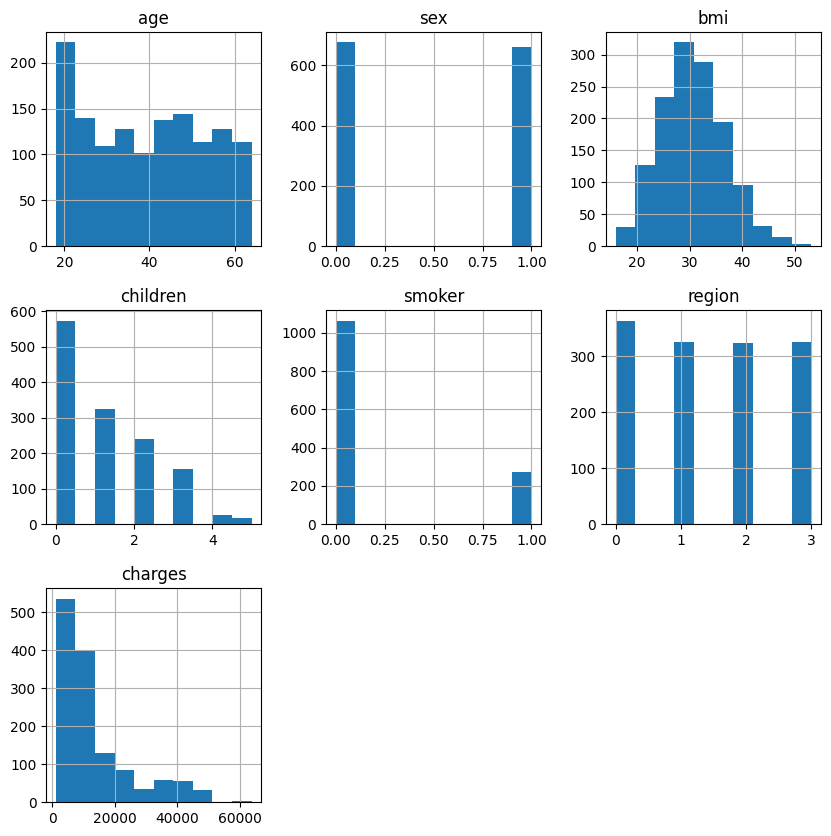

In [10]:
#Histogramas de todas las variables
df.hist(figsize=(10,10))
plt.show()

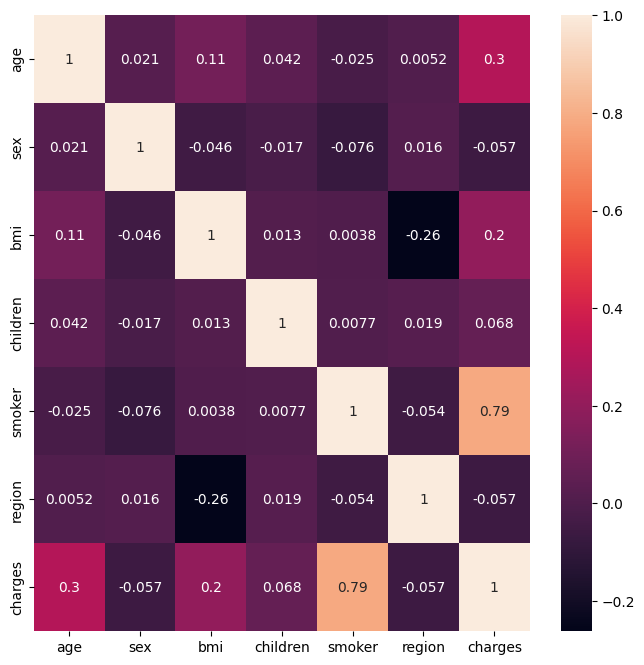

In [11]:
#Correlación entre variables
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True)

Podemos notar que las correlación entre las varibles *smoker* y *charges* es muy alta. Esto nos indica que el hecho de que una persona fume o no, afecta significativamente los costos médicos.

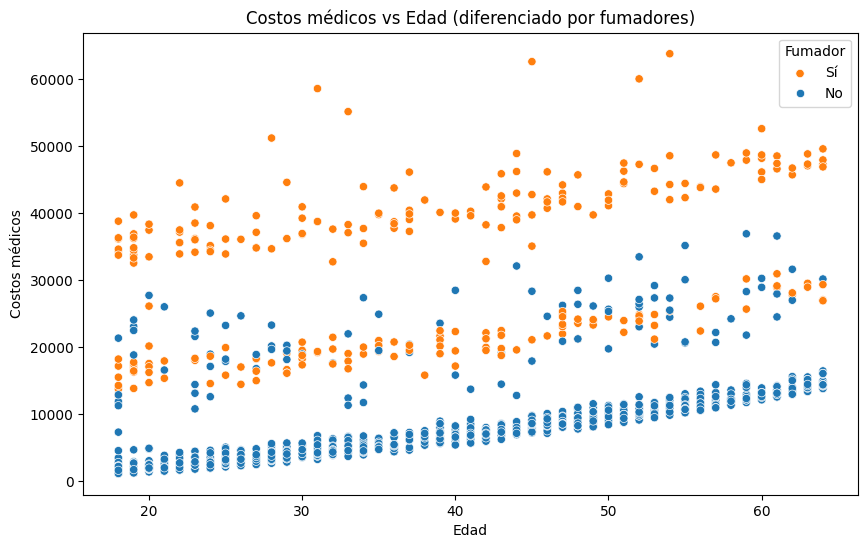

In [12]:
#Gráfico de dispersión para visualizar la relación entre la edad y los costos médicos, coloreando los puntos según si son fumadores o no
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['age'], y=df['charges'], hue='smoker', data=df)
plt.title('Costos médicos vs Edad (diferenciado por fumadores)')
plt.xlabel('Edad')
plt.ylabel('Costos médicos')
plt.legend(title='Fumador', labels=['Sí', 'No'])
plt.show()

Podemos ver que los fumadores tienen costos médicos más altos en todas las edades, en comparación a los que no fuman. Además, conforme aumenta la edad, también aumentan los costos médicos.

Sin embargo, la variabilidad dentro del grupo de fumadores sigue siendo alta (puntos dispersos en valores altos), lo que sugiere que otros factores interactúan con el tabaquismo.

Sabemos que un BMI > 30 es sobrepeso/obesidad, por lo que fumadores con obesidad podrían tener costos más altos que los que tienen un BMI normal. En la siguiente gráfica se visualiza esta interacción (fumador y BMI).

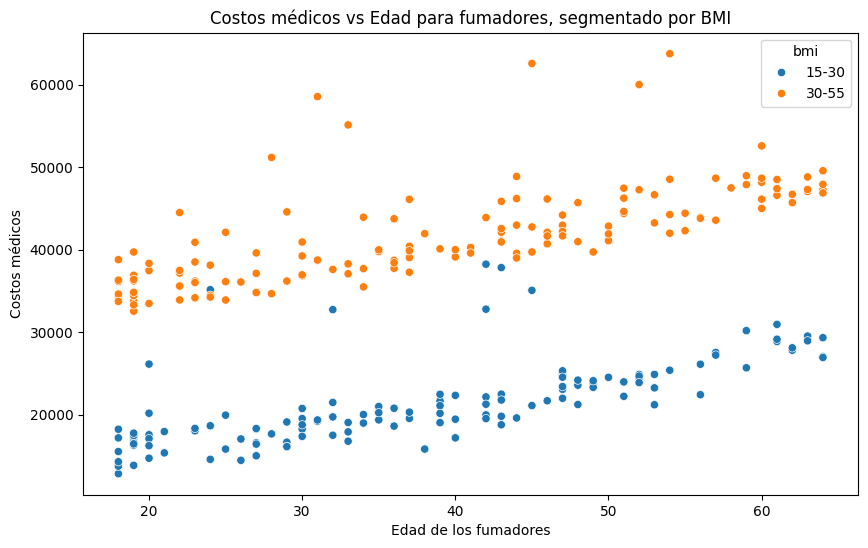

In [13]:
#Graficar la relación entre los costos médicos y la edad, pero sólo de los fumadores, categorizando el BMI en dos grupos
plt.figure(figsize=(10,6))

'''Crear 2 categorías para BMI usando un punto de corte de 30:
    - '15-30': BMI normal o bajo
    - '30-55': BMI alto (sobrepeso/obesidad)'''
cutoff_point = 30 
df_copy = df.copy()
df_copy['bmi'] = pd.cut(df_copy['bmi'], bins=[-np.inf, cutoff_point, np.inf], labels=['15-30', '30-55'])

sns.scatterplot(x=df_copy[df_copy['smoker']==1]['age'], 
                y=df_copy['charges'], 
                hue='bmi', 
                data=df_copy)
plt.title('Costos médicos vs Edad para fumadores, segmentado por BMI')
plt.xlabel('Edad de los fumadores')
plt.ylabel('Costos médicos')
plt.show()

Los fumadores con BMI > 30 muestran costos médicos más altos en todas las edades en comparación con fumadores de BMI normal. Por lo tanto, la gráfica confirma que el BMI es un moderador crítico en la relación entre tabaquismo y costos médicos.

## **Regresión Lineal**

In [14]:
X = df.drop(['charges'], axis = 1) #Variables predictoras (todas excepto charges)
y = df['charges'] #Variable objetivo

In [15]:
#Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape, y_train.shape}")
print(f"Test: {X_test.shape, y_test.shape}")

Train: ((1070, 6), (1070,))
Test: ((268, 6), (268,))


In [16]:
lr = LinearRegression() #Crear una instancia del modelo de regresión lineal
lr.fit(X_train, y_train) #Entrenar el modelo con los datos de entrenamiento

LinearRegression()

In [17]:
#Intercept: Costo médico predicho cuando todas las variables predictoras son 0
print("Intercepto:", lr.intercept_)

Intercepto: -12580.898279441999


El intercepto indica que si un paciente tuviera age=0, sex=0 (masculino), bmi=0, children=0, smoker=0 (no fumador) y region=0 (sudeste), el modelo predeciría un costo médico de -12,580.90 USD. 

Esto no tiene sentido práctico, ya que los costos médicos no pueden ser negativos, y variables como edad o BMI no pueden ser 0 en un contexto real. Por lo tanto, su valor negativo no implica un problema en el modelo

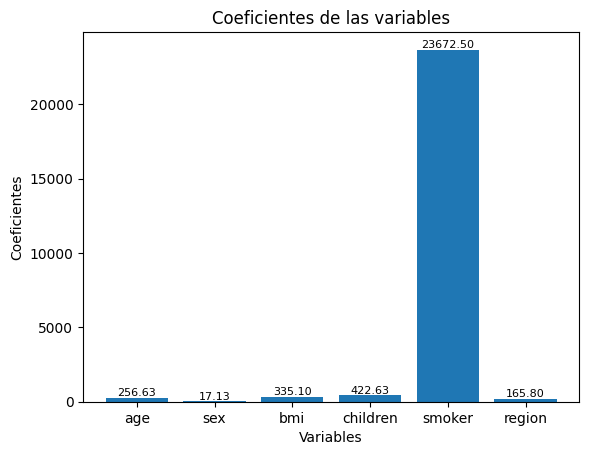

In [18]:
#Coefficients: Representan el impacto individual de cada variable predictora en el costo médico
bars = plt.bar(X_train.columns, lr.coef_)

#Añadir valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Coeficientes de las variables')
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.show()

* **age:** Por cada año adicional de edad, el costo médico aumenta 256.63 USD.
* **sex:** Si sex=1 (femenino), el costo aumenta 17.13 USD en comparación con sex=0 (masculino).
* **bmi:** Por cada unidad adicional de BMI, el costo aumenta 335.10 USD.
* **clidren:** Por cada hijo adicional cubierto por el seguro, el costo aumenta 422.63 USD.
* **smoker:** Ser fumador (smoker=1) aumenta el costo en 23,672.50 USD en comparación a los no fumadores.
* **region:** Dependiendo de la región, el costo varía en 165.80 USD.

Con esto volvemos a notar que el hecho de fumar aumenta significativamente el valor de los costos médicos.

In [19]:
#Predicciones en train y test
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [20]:
#Función para obtener las métricas de evaluación
def evaluate_model(y, y_pred, dataset):
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f'\nMSE en {dataset}: {mse}')
    print(f'R² Score en {dataset}: {r2}')

    return r2

In [21]:
_ = evaluate_model(y_train, y_pred_train, 'train')
_ = evaluate_model(y_test, y_pred_test, 'test')


MSE en train: 37337214.4107756
R² Score en train: 0.7413131194887537

MSE en test: 33685623.354144424
R² Score en test: 0.783021587162344


In [22]:
#Función para graficar los costos reales vs. los predichos
def plot_actual_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    y = np.arange(0, y_test.max())
    plt.plot(y, y, linestyle='--', color='red')
    plt.xlabel('Costos reales')
    plt.ylabel('Costos predichos')
    plt.title('Costos reales vs. Costos predichos')
    plt.grid(True)
    plt.show()

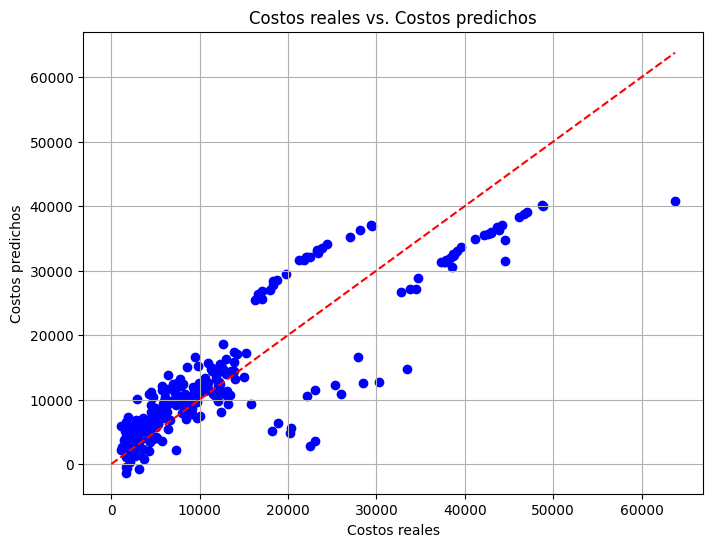

In [23]:
plot_actual_predicted(y_test, y_pred_test)

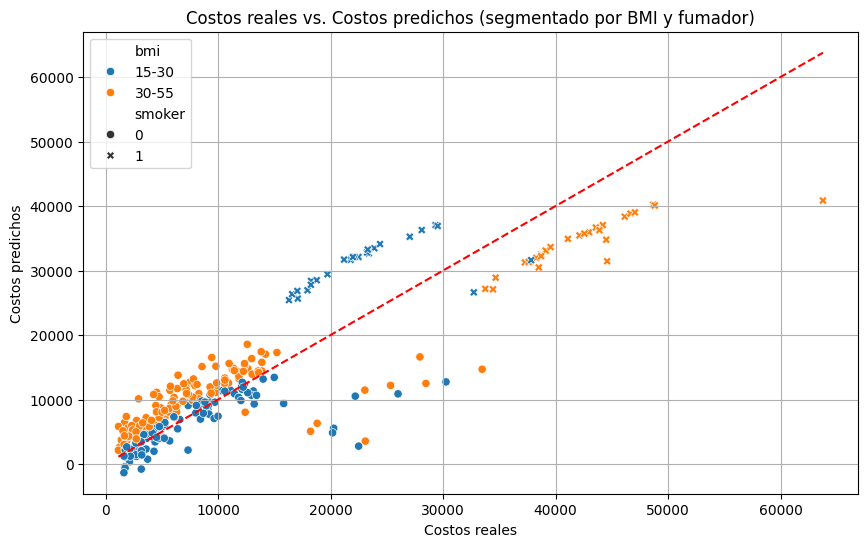

In [24]:
#Crear un dataframe que combine y_test, y_pred_test, smoker y bmi
data = pd.DataFrame({
    'y_test': y_test, #Costos médicos reales (datos de prueba)
    'y_pred': y_pred_test, #Costos predichos por el modelo
    'smoker': X_test['smoker'], #Si el paciente es fumador (1) o no (0)
    'bmi': X_test['bmi'] #Índice de masa corporal
})

'''Clasificar el BMI en dos categorías para una mejor visualización:
    - '15-30': BMI normal o bajo
    - '30-55': BMI alto (sobrepeso/obesidad)'''
data['bmi'] = pd.cut(data['bmi'], bins = [-np.inf, 30, np.inf], labels = ['15-30', '30-55'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='y_test', y='y_pred', hue='bmi', style='smoker', data=data)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Costos reales vs. Costos predichos (segmentado por BMI y fumador)')
plt.xlabel('Costos reales')
plt.ylabel('Costos predichos')
plt.grid(True)
plt.show()

Se observa que para los no fumadores (sin importar su BMI), en la mayoría de los casos el modelo hace buenas predicciones.

También podemos notar que para los fumadores con BMI entre 30-55 (cruces naranjas), los costos predichos tienden a ser más bajos en comparación a los reales.

Por otro lado, para los fumadores con BMI entre 15-30 (cruces azules), los costos predichos tienden a ser más altos en comparación a los reales.

Por lo tanto, podrían crearse dos modelos de regresión separados, uno para fumadores con BMI entre 15-30 y otro para el resto de los casos (no fumadores o BMI > 30).

In [25]:
#Clasificar los valores de BMI en dos categorías: '15-30' para valores <=30 y '30-55' para valores >30
df['bmi_category'] = pd.cut(df['bmi'], bins=[-np.inf, 30, np.inf], labels=['15-30', '30-55'])

#Dataset para fumadores con BMI entre 15-30
df_15 = df[(df['smoker'] == 1) & (df['bmi_category'] == '15-30')]

#Dataset para los demás (no fumadores o BMI > 30)
df_others = df[(df['smoker'] == 0) | (df['bmi_category'] == '30-55')]

### **Regresión Lineal para fumadores con BMI entre 15 y 30**


MSE en train: 13591278.586661547
R² Score en train: 0.47915730202712314

MSE en test: 2813182.90699737
R² Score en test: 0.8603056176975473


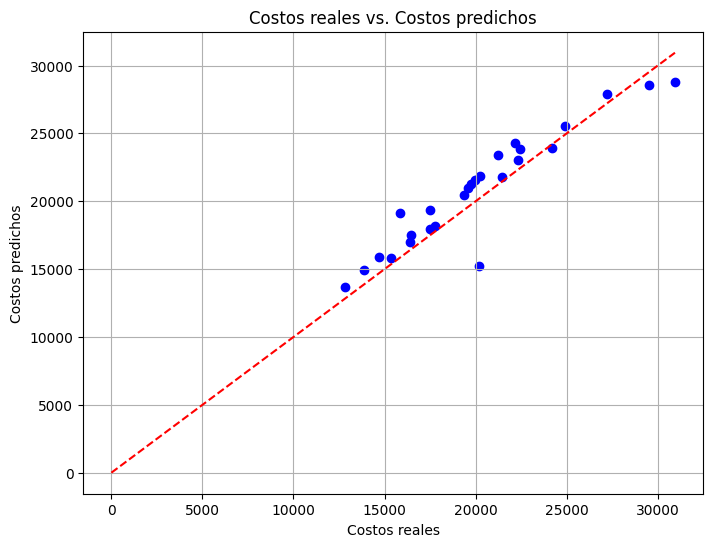

In [26]:
X_15 = df_15.drop(['charges', 'bmi_category'], axis=1) #Variables predictoras
y_15 = df_15['charges'] #Variable objetivo

#Dividir el conjunto de datos en entrenamiento y prueba
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

#Instanciar y entrenar el modelo
lr_15 = LinearRegression()
lr_15.fit(X_train_15, y_train_15)

#Predicciones
y_pred_train_15 = lr_15.predict(X_train_15)
y_pred_test_15 = lr_15.predict(X_test_15)

#Evaluar el modelo
r2_15_train_lr = evaluate_model(y_train_15, y_pred_train_15, 'train')
r2_15_test_lr = evaluate_model(y_test_15, y_pred_test_15, 'test')

#Graficar los costos reales vs. los predichos
plot_actual_predicted(y_test_15, y_pred_test_15)

El modelo se ajusta muy bien a los datos de prueba, pero en los datos de entrenamiento hay un mal desempeño, por lo que este modelo presenta sobreajuste.

### **Regresión Lineal para no fumadores o BMI entre 30 y 55**


MSE en train: 19881954.47353924
R² Score en train: 0.8678644498500184

MSE en test: 23374673.331075445
R² Score en test: 0.8507181008776477


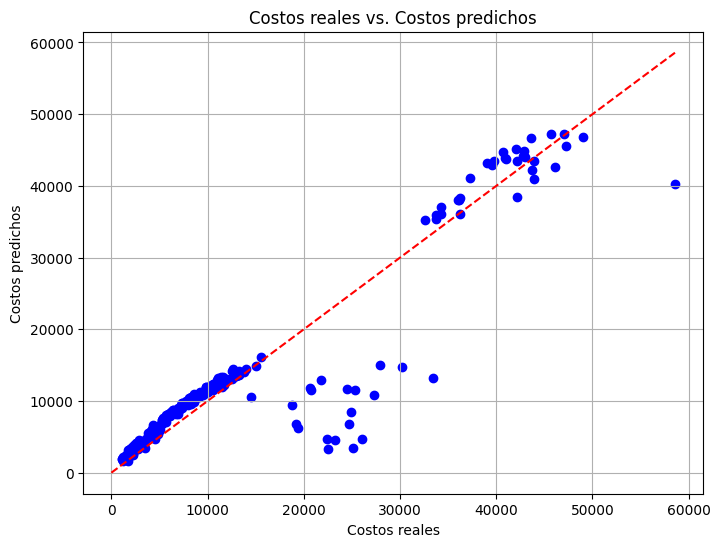

In [27]:
X_others = df_others.drop(['charges', 'bmi_category'], axis=1) #Variables predictoras
y_others = df_others['charges'] #Variable objetivo

#Dividir el conjunto de datos en entrenamiento y prueba
X_train_others, X_test_others, y_train_others, y_test_others = train_test_split(X_others, y_others, test_size=0.2, random_state=42)

#Instanciar y entrenar el modelo
lr_others = LinearRegression()
lr_others.fit(X_train_others, y_train_others)

#Predicciones
y_pred_train_others = lr_others.predict(X_train_others)
y_pred_test_others = lr_others.predict(X_test_others)

#Evaluar el modelo
r2_others_train_lr = evaluate_model(y_train_others, y_pred_train_others, 'train')
r2_others_test_lr = evaluate_model(y_test_others, y_pred_test_others, 'test')

#Graficar los costos reales vs. los predichos
plot_actual_predicted(y_test_others, y_pred_test_others)

## **Regresión Polinomial**

Seguiremos la misma lógica de la regresión lineal, crear dos modelos separados, uno para fumadores con BMI entre 15-30 y otro para el resto de los casos (no fumadores o BMI > 30), sólo que ahora se empleará regresión polinomial para comparar los resultados.

In [28]:
#Cargar nuevamente los datos para la regresión polinomial
df = pd.read_csv('insurance.csv')

#Convertir variables categóricas a numéricas
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\yamil\AppData\Local\Temp\ipykernel_9648\1533384516.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_9648\1533384516.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_9648\1533384516.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

In [29]:
#Clasificar los valores de BMI en dos categorías: '15-30' para valores <=30 y '30-55' para valores >30
df['bmi_category'] = pd.cut(df['bmi'], bins=[-np.inf, 30, np.inf], labels=['15-30', '30-55'])

#Dataset para fumadores con BMI entre 15-30
df_15 = df[(df['smoker'] == 1) & (df['bmi_category'] == '15-30')]

#Dataset para los demás (no fumadores o BMI > 30)
df_others = df[(df['smoker'] == 0) | (df['bmi_category'] == '30-55')]

In [30]:
#Función para realizar regresión polinomial (retorna: el modelo entrenado y el transformador de características polinomiales)
def polynomial_regression(X, y, degree):
    #Crea el transformador para generar características polinomiales hasta el grado especificado
    poly = PolynomialFeatures(degree=degree)
    
    #Transforma las características originales en características polinomiales
    X_poly = poly.fit_transform(X)

    #Crea y entrena un modelo de regresión lineal usando las características polinomiales
    model = LinearRegression()
    model.fit(X_poly, y)
    
    return model, poly

### **Regresión Polinomial para fumadores con BMI entre 15 y 30**


MSE en train: 4.367975553148171e-11
R² Score en train: 1.0

MSE en test: 3.428617929284411e-11
R² Score en test: 1.0


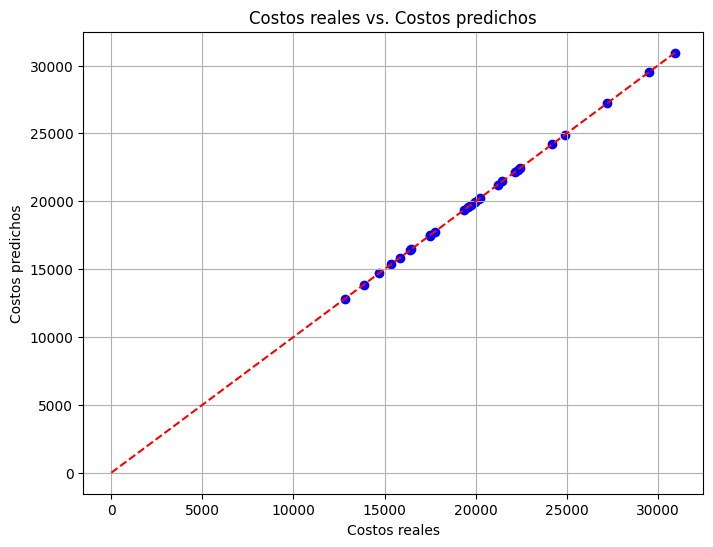

In [31]:
X_15 = df_15.drop(['charges', 'bmi_category'], axis=1) #Variables predictoras
y_15 = df_15['charges'] #Variable objetivo

#Dividir el conjunto de datos en entrenamiento y prueba
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

#Regresión polinomial de grado 5
model_15, poly_15 = polynomial_regression(X_15, y_15, degree=5)

#Transformar los datos
X_train_poly_15 = poly_15.transform(X_train_15)
X_test_poly_15 = poly_15.transform(X_test_15)

#Predicciones
y_pred_train_15 = model_15.predict(X_train_poly_15)
y_pred_test_15 = model_15.predict(X_test_poly_15)

#Evaluar el modelo
r2_15_train_poly = evaluate_model(y_train_15, y_pred_train_15, 'train')
r2_15_test_poly = evaluate_model(y_test_15, y_pred_test_15, 'test')

#Graficar los costos reales vs. los predichos
plot_actual_predicted(y_test_15, y_pred_test_15)

Este modelo corrige el problema de sobreajuste que presentaba la regresión lineal en este grupo, demostrando que una regresión polinomial de grado 5 es la solución óptima para predecir los costos médicos de fumadores con BMI entre 15 y 30.

### **Regresión Polinomial para no fumadores o BMI entre 30 y 55**


MSE en train: 18933205.38692856
R² Score en train: 0.8741698401314639

MSE en test: 22031265.461527847
R² Score en test: 0.8592977492526845


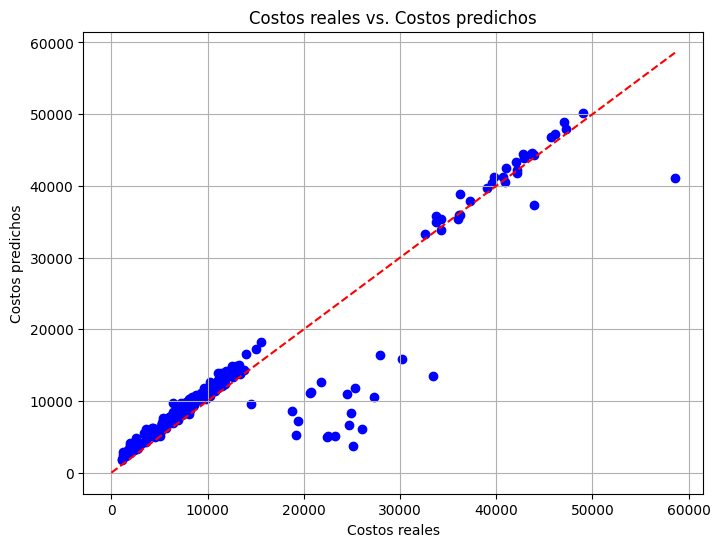

In [32]:
X_others = df_others.drop(['charges', 'bmi_category'], axis=1) #Variables predictoras
y_others = df_others['charges'] #Variable objetivo

#Dividir el conjunto de datos en entrenamiento y prueba
X_train_others, X_test_others, y_train_others, y_test_others = train_test_split(X_others, y_others, test_size=0.2, random_state=42)

#Regresión polinomial de grado 2
model_others, poly_others = polynomial_regression(X_train_others, y_train_others, degree=2)

#Transformar los datos
X_train_poly_others = poly_others.transform(X_train_others)
X_test_poly_others = poly_others.transform(X_test_others)

#Predicciones
y_pred_train_others = model_others.predict(X_train_poly_others)
y_pred_test_others = model_others.predict(X_test_poly_others)

#Evaluar el modelo
r2_others_train_poly =evaluate_model(y_train_others, y_pred_train_others, 'train')
r2_others_test_poly = evaluate_model(y_test_others, y_pred_test_others, 'test')

#Graficar los costos reales vs. los predichos
plot_actual_predicted(y_test_others, y_pred_test_others)


Los resultados muestran que este modelo tiene un rendimiento muy similar al modelo de regresión lineal para este grupo, lo que muestra que la relación es predominantemente lineal.

## **Resultados y conclusión**

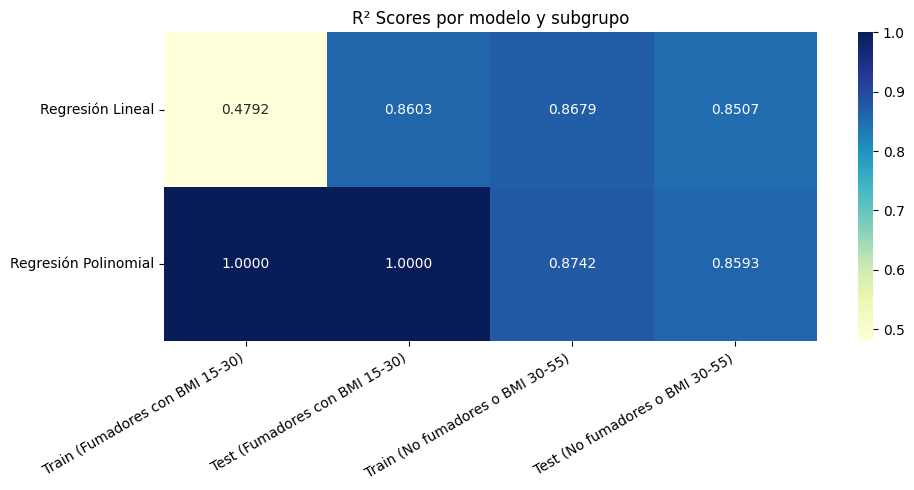

In [33]:
#Mapa de calor comparativo de los R² scores entre modelos lineales y polinomiales para los diferentes subgrupos analizados
data = {
    'Train (Fumadores con BMI 15-30)': [r2_15_train_lr, r2_15_train_poly],
    'Test (Fumadores con BMI 15-30)': [r2_15_test_lr, r2_15_test_poly],
    'Train (No fumadores o BMI 30-55)': [r2_others_train_lr, r2_others_train_poly],
    'Test (No fumadores o BMI 30-55)': [r2_others_test_lr, r2_others_test_poly],
}

index = ['Regresión Lineal', 'Regresión Polinomial']

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(10, 5))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('R² Scores por modelo y subgrupo')
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Los resultados demuestran que la segmentación de los datos en dos grupos es una buena estrategia para predecir los costos médicos con una mayor precisión. Mientras que el modelo general (sin segmentar) presenta un rendimiento limitado (R² de 0.74 en entrenamiento y 0.78 en prueba), los modelos específicos lograron:
* Para el grupo de fumadores con BMI entre 15 y 30, la regresión polinomial logra un ajuste perfecto, posiblemente por patrones no lineales en este grupo. Esto corrigió el problema inicial donde el modelo general sobreestimaba sus costos.
* Para el grupo de no fumadores o BMI > 30, la regresión lineal fue suficiente, ya que esta tiene un rendimiento muy similar al de la regresión polinomial. Esto resolvió la subestimación de costos que presentaba el modelo general para fumadores con BMI alto.